# Assignment 7 (Face Aging Using GAN)

In this assignment, I have used Cycle GAN to perform face aging of persons. I have downloaded datasets from UKN which has datasets for of images of persons across the world and each file name has age mentioned.

What I did is to take all the persons having age 20-30 kept in folder datasets/face_aging/trainA_temp and all the persons in age group 50-60 I have kept in folder datasets/face_aging/trainA_temp.

Since image has also background which can impact the Cycle GAN performance, I have extracted only face for persons using MTCNN openCV library and kept in folders datasets/face_aging/trainA for persons having age group 20-30 and  datasets/face_aging/trainB
for persons hacing age group 50-60. I have moved 10% of files to test folders datasets/face_aging/trainA

Next, I have trained using Cycle GAN. I have taken base code from https://github.com/d1ggs/cycleGAN-keras


## Import libraries

import numpy as np
from tqdm import trange, tqdm
import glob
import h5py

from keras.optimizers import Adam
from keras import backend as K
from keras.preprocessing import image

import random

from models import components, mae_loss, mse_loss
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from keras import initializers
from keras.layers import Input, BatchNormalization, Activation, Lambda, ZeroPadding2D, Concatenate, Cropping2D, MaxPooling2D
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.utils.vis_utils import plot_model
from keras_contrib.layers import InstanceNormalization
import tensorflow as tf

from keras import backend as K

from residual import Residual
#from unet_generator import generator_unet_deconv

import numpy as np

## Install mtcnn, opencv-contrib-python

In [2]:
!pip install mtcnn

You are using pip version 18.1, however version 19.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!pip install opencv-contrib-python

You are using pip version 18.1, however version 19.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Preprocessing Images

- Define method extract_face for extacting only face from image
- Define method to load faces from a directory specified and  and put to a destination directory
- Geneated faces for images from trainA_temp and put to trainA
- Geneated faces for images from trainA_temp and put to trainA

In [4]:
# load an image as an rgb numpy array
def load_image(filename):
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

In [5]:
from mtcnn.mtcnn import MTCNN
import cv2
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
import scipy.misc


# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(256, 256)):
    # detect face in the image
    faces = model.detect_faces(pixels)
    # skip cases where we could not detect a face
    if len(faces) == 0:
        return None
    # extract details of the face
    x1, y1, width, height = faces[0]['box']
    # force detected pixel values to be positive (bug fix)
    x1, y1 = abs(x1), abs(y1)
    # convert into coordinates
    x2, y2 = x1 + width, y1 + height
    # retrieve face pixels
    face_pixels = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

def load_faces(input_directory, output_directory, n_faces = -1):
# prepare model
    model = MTCNN()
    faces = list()
    # enumerate files
    for filename in listdir(input_directory):
    # load the image
        print("generating face for file", filename)
        pixels = load_image(input_directory + "/" + filename)
        # get face
        face = extract_face(model, pixels)
        if face is None:
            continue
        scipy.misc.imsave(output_directory + "/" + filename, face)
        # store
        faces.append(face)
        print(len(faces), face.shape)
        # stop once we have enough
        if n_faces > 0 and len(faces) >= n_faces:
            break
    return asarray(faces)

In [6]:
load_faces("./datasets/face_aging_20_50/trainA_temp","./datasets/face_aging_20_50/trainA", n_faces = -1)

generating face for file 20_0_0_20170104020603909.jpg


E:\anaconda\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


1 (256, 256, 3)
generating face for file 20_0_0_20170104230025073.jpg
2 (256, 256, 3)
generating face for file 20_0_0_20170104230042553.jpg
3 (256, 256, 3)
generating face for file 20_0_0_20170104230048181.jpg
4 (256, 256, 3)
generating face for file 20_0_0_20170104230051977.jpg
5 (256, 256, 3)
generating face for file 20_0_0_20170104230054071.jpg
6 (256, 256, 3)
generating face for file 20_0_0_20170105161704786.jpg
7 (256, 256, 3)
generating face for file 20_0_0_20170105161706251.jpg
8 (256, 256, 3)
generating face for file 20_0_0_20170105183430767.jpg
9 (256, 256, 3)
generating face for file 20_0_0_20170105184038831.jpg
10 (256, 256, 3)
generating face for file 20_0_0_20170110231653536.jpg
11 (256, 256, 3)
generating face for file 20_0_0_20170110232156775.jpg
12 (256, 256, 3)
generating face for file 20_0_2_20170103234745028.jpg
13 (256, 256, 3)
generating face for file 20_0_3_20170104214317461.jpg
14 (256, 256, 3)
generating face for file 20_0_3_20170104214325910.jpg
15 (256, 256, 3

117 (256, 256, 3)
generating face for file 21_0_2_20170107213417643.jpg
118 (256, 256, 3)
generating face for file 21_0_3_20161220221819298.jpg
119 (256, 256, 3)
generating face for file 21_0_3_20170104214322765.jpg
120 (256, 256, 3)
generating face for file 21_0_3_20170104225749698.jpg
121 (256, 256, 3)
generating face for file 21_0_3_20170104225826937.jpg
122 (256, 256, 3)
generating face for file 21_0_3_20170104225910065.jpg
123 (256, 256, 3)
generating face for file 21_0_3_20170104230524803.jpg
124 (256, 256, 3)
generating face for file 21_0_3_20170104230718873.jpg
125 (256, 256, 3)
generating face for file 21_0_4_20161223214759249.jpg
126 (256, 256, 3)
generating face for file 21_0_4_20161223214802865.jpg
127 (256, 256, 3)
generating face for file 21_0_4_20161223214805057.jpg
128 (256, 256, 3)
generating face for file 21_0_4_20161223214812864.jpg
129 (256, 256, 3)
generating face for file 21_0_4_20161223214813672.jpg
130 (256, 256, 3)
generating face for file 21_0_4_20161223214820

231 (256, 256, 3)
generating face for file 21_1_4_20170103224936983.jpg
232 (256, 256, 3)
generating face for file 21_1_4_20170103225014665.jpg
233 (256, 256, 3)
generating face for file 21_1_4_20170103225020282.jpg
234 (256, 256, 3)
generating face for file 21_1_4_20170103225212711.jpg
235 (256, 256, 3)
generating face for file 21_1_4_20170103230000841.jpg
236 (256, 256, 3)
generating face for file 21_1_4_20170103230521217.jpg
237 (256, 256, 3)
generating face for file 21_1_4_20170103233532676.jpg
238 (256, 256, 3)
generating face for file 21_1_4_20170103233920299.jpg
239 (256, 256, 3)
generating face for file 21_1_4_20170103233924667.jpg
240 (256, 256, 3)
generating face for file 21_1_4_20170103234037067.jpg
241 (256, 256, 3)
generating face for file 21_1_4_20170104005731615.jpg
242 (256, 256, 3)
generating face for file 22_0_0_20170103180152583.jpg
243 (256, 256, 3)
generating face for file 22_0_0_20170103234830581.jpg
244 (256, 256, 3)
generating face for file 22_0_0_20170104002331

345 (256, 256, 3)
generating face for file 22_1_3_20170104232054915.jpg
346 (256, 256, 3)
generating face for file 22_1_3_20170104232454786.jpg
347 (256, 256, 3)
generating face for file 22_1_3_20170104232458346.jpg
348 (256, 256, 3)
generating face for file 22_1_3_20170104232504850.jpg
349 (256, 256, 3)
generating face for file 22_1_3_20170104232533912.jpg
350 (256, 256, 3)
generating face for file 22_1_3_20170104234459677.jpg
351 (256, 256, 3)
generating face for file 22_1_3_20170105002128188.jpg
352 (256, 256, 3)
generating face for file 22_1_3_20170105002553629.jpg
353 (256, 256, 3)
generating face for file 22_1_3_20170109131950179.jpg
354 (256, 256, 3)
generating face for file 22_1_3_20170109132213417.jpg
355 (256, 256, 3)
generating face for file 22_1_4_20161221195925096.jpg
356 (256, 256, 3)
generating face for file 22_1_4_20161223225936076.jpg
357 (256, 256, 3)
generating face for file 22_1_4_20170103180220911.jpg
358 (256, 256, 3)
generating face for file 22_1_4_20170103212717

459 (256, 256, 3)
generating face for file 23_1_4_20170103223551622.jpg
460 (256, 256, 3)
generating face for file 23_1_4_20170103223554895.jpg
461 (256, 256, 3)
generating face for file 23_1_4_20170103223558799.jpg
462 (256, 256, 3)
generating face for file 23_1_4_20170103223600551.jpg
463 (256, 256, 3)
generating face for file 23_1_4_20170103223615095.jpg
464 (256, 256, 3)
generating face for file 23_1_4_20170103223618431.jpg
465 (256, 256, 3)
generating face for file 23_1_4_20170103223903439.jpg
466 (256, 256, 3)
generating face for file 23_1_4_20170103224258631.jpg
467 (256, 256, 3)
generating face for file 23_1_4_20170103224510895.jpg
468 (256, 256, 3)
generating face for file 23_1_4_20170103225140728.jpg
469 (256, 256, 3)
generating face for file 23_1_4_20170103225807185.jpg
470 (256, 256, 3)
generating face for file 23_1_4_20170103233611875.jpg
471 (256, 256, 3)
generating face for file 23_1_4_20170103233615355.jpg
472 (256, 256, 3)
generating face for file 23_1_4_20170103233619

573 (256, 256, 3)
generating face for file 24_1_2_20170104234618170.jpg
574 (256, 256, 3)
generating face for file 24_1_2_20170105162251371.jpg
575 (256, 256, 3)
generating face for file 24_1_2_20170105184025097.jpg
576 (256, 256, 3)
generating face for file 24_1_2_20170109213251114.jpg
577 (256, 256, 3)
generating face for file 24_1_3_20161220221541210.jpg
578 (256, 256, 3)
generating face for file 24_1_3_20161220221647314.jpg
579 (256, 256, 3)
generating face for file 24_1_3_20161220221743058.jpg
580 (256, 256, 3)
generating face for file 24_1_3_20161220222118601.jpg
581 (256, 256, 3)
generating face for file 24_1_3_20170104214534021.jpg
582 (256, 256, 3)
generating face for file 24_1_3_20170104215645565.jpg
583 (256, 256, 3)
generating face for file 24_1_3_20170104215731414.jpg
584 (256, 256, 3)
generating face for file 24_1_3_20170104220232144.jpg
585 (256, 256, 3)
generating face for file 24_1_3_20170104222339654.jpg
586 (256, 256, 3)
generating face for file 24_1_3_20170104222352

687 (256, 256, 3)
generating face for file 25_0_3_20170104214610101.jpg
688 (256, 256, 3)
generating face for file 25_0_3_20170104214613229.jpg
689 (256, 256, 3)
generating face for file 25_0_3_20170104220223342.jpg
690 (256, 256, 3)
generating face for file 25_0_3_20170104230227202.jpg
691 (256, 256, 3)
generating face for file 25_0_3_20170104230440360.jpg
692 (256, 256, 3)
generating face for file 25_0_3_20170104230516489.jpg
693 (256, 256, 3)
generating face for file 25_0_3_20170105175316102.jpg
694 (256, 256, 3)
generating face for file 25_0_3_20170107213404617.jpg
695 (256, 256, 3)
generating face for file 25_0_4_20170103230228713.jpg
696 (256, 256, 3)
generating face for file 25_0_4_20170103233741427.jpg
697 (256, 256, 3)
generating face for file 25_0_4_20170103235109805.jpg
698 (256, 256, 3)
generating face for file 25_0_4_20170103235145124.jpg
699 (256, 256, 3)
generating face for file 25_1_0_20170103163054063.jpg
700 (256, 256, 3)
generating face for file 25_1_0_20170103163218

801 (256, 256, 3)
generating face for file 25_1_4_20161221193646742.jpg
802 (256, 256, 3)
generating face for file 25_1_4_20161221195850512.jpg
803 (256, 256, 3)
generating face for file 25_1_4_20161223214751864.jpg
804 (256, 256, 3)
generating face for file 25_1_4_20161223230018963.jpg
805 (256, 256, 3)
generating face for file 25_1_4_20170103180849713.jpg
806 (256, 256, 3)
generating face for file 25_1_4_20170103182320042.jpg
807 (256, 256, 3)
generating face for file 25_1_4_20170103210241074.jpg
808 (256, 256, 3)
generating face for file 25_1_4_20170103212758572.jpg
809 (256, 256, 3)
generating face for file 25_1_4_20170103223138663.jpg
810 (256, 256, 3)
generating face for file 25_1_4_20170103223548135.jpg
811 (256, 256, 3)
generating face for file 25_1_4_20170103223722679.jpg
812 (256, 256, 3)
generating face for file 25_1_4_20170103224600280.jpg
813 (256, 256, 3)
generating face for file 25_1_4_20170103224747408.jpg
814 (256, 256, 3)
generating face for file 25_1_4_20170103225751

915 (256, 256, 3)
generating face for file 26_1_0_20170103175557343.jpg
916 (256, 256, 3)
generating face for file 26_1_0_20170103180235712.jpg
917 (256, 256, 3)
generating face for file 26_1_0_20170103180530224.jpg
918 (256, 256, 3)
generating face for file 26_1_0_20170103180546928.jpg
919 (256, 256, 3)
generating face for file 26_1_0_20170103180649464.jpg
920 (256, 256, 3)
generating face for file 26_1_0_20170103180946896.jpg
921 (256, 256, 3)
generating face for file 26_1_0_20170103181112840.jpg
922 (256, 256, 3)
generating face for file 26_1_0_20170103181123449.jpg
923 (256, 256, 3)
generating face for file 26_1_0_20170103181326336.jpg
924 (256, 256, 3)
generating face for file 26_1_0_20170103181710200.jpg
925 (256, 256, 3)
generating face for file 26_1_0_20170103181852617.jpg
926 (256, 256, 3)
generating face for file 26_1_0_20170103181901521.jpg
927 (256, 256, 3)
generating face for file 26_1_0_20170103181926881.jpg
928 (256, 256, 3)
generating face for file 26_1_0_20170103181940

1029 (256, 256, 3)
generating face for file 26_1_3_20170104223022663.jpg
1030 (256, 256, 3)
generating face for file 26_1_3_20170104223033351.jpg
1031 (256, 256, 3)
generating face for file 26_1_3_20170104223054575.jpg
1032 (256, 256, 3)
generating face for file 26_1_3_20170104223100991.jpg
1033 (256, 256, 3)
generating face for file 26_1_3_20170104223128119.jpg
1034 (256, 256, 3)
generating face for file 26_1_3_20170104223130527.jpg
1035 (256, 256, 3)
generating face for file 26_1_3_20170104223133454.jpg
1036 (256, 256, 3)
generating face for file 26_1_3_20170104223139599.jpg
1037 (256, 256, 3)
generating face for file 26_1_3_20170104223140343.jpg
1038 (256, 256, 3)
generating face for file 26_1_3_20170104231407282.jpg
1039 (256, 256, 3)
generating face for file 26_1_3_20170104232120449.jpg
1040 (256, 256, 3)
generating face for file 26_1_3_20170104232131633.jpg
1041 (256, 256, 3)
generating face for file 26_1_3_20170104232139409.jpg
1042 (256, 256, 3)
generating face for file 26_1_3_

1142 (256, 256, 3)
generating face for file 27_0_4_20170103235752276.jpg
1143 (256, 256, 3)
generating face for file 27_0_4_20170103235757172.jpg
1144 (256, 256, 3)
generating face for file 27_0_4_20170103235800445.jpg
1145 (256, 256, 3)
generating face for file 27_0_4_20170104002159117.jpg
1146 (256, 256, 3)
generating face for file 27_0_4_20170104011307960.jpg
1147 (256, 256, 3)
generating face for file 27_0_4_20170104194349352.jpg
1148 (256, 256, 3)
generating face for file 27_0_4_20170105163841596.jpg
1149 (256, 256, 3)
generating face for file 27_1_0_20170103163215342.jpg
1150 (256, 256, 3)
generating face for file 27_1_0_20170103175534240.jpg
1151 (256, 256, 3)
generating face for file 27_1_0_20170103180241879.jpg
1152 (256, 256, 3)
generating face for file 27_1_0_20170103180510792.jpg
1153 (256, 256, 3)
generating face for file 27_1_0_20170103180554504.jpg
1154 (256, 256, 3)
generating face for file 27_1_0_20170103181541352.jpg
1155 (256, 256, 3)
generating face for file 27_1_0_

1255 (256, 256, 3)
generating face for file 28_0_3_20170104220242582.jpg
1256 (256, 256, 3)
generating face for file 28_0_3_20170104220258078.jpg
1257 (256, 256, 3)
generating face for file 28_0_3_20170104220743173.jpg
1258 (256, 256, 3)
generating face for file 28_0_3_20170104230628769.jpg
1259 (256, 256, 3)
generating face for file 28_0_3_20170104232323178.jpg
1260 (256, 256, 3)
generating face for file 28_0_3_20170104232432992.jpg
1261 (256, 256, 3)
generating face for file 28_0_3_20170105175516710.jpg
1262 (256, 256, 3)
generating face for file 28_0_3_20170109002910810.jpg
1263 (256, 256, 3)
generating face for file 28_0_4_20170103184156947.jpg
1264 (256, 256, 3)
generating face for file 28_0_4_20170103213024052.jpg
1265 (256, 256, 3)
generating face for file 28_0_4_20170103235229669.jpg
1266 (256, 256, 3)
generating face for file 28_0_4_20170103235312020.jpg
1267 (256, 256, 3)
generating face for file 28_0_4_20170103235541444.jpg
1268 (256, 256, 3)
generating face for file 28_0_4_

1368 (256, 256, 3)
generating face for file 28_1_4_20170103235557846.jpg
1369 (256, 256, 3)
generating face for file 28_1_4_20170103235832524.jpg
1370 (256, 256, 3)
generating face for file 28_1_4_20170104000708986.jpg
1371 (256, 256, 3)
generating face for file 28_1_4_20170104165215184.jpg
1372 (256, 256, 3)
generating face for file 28_1_4_20170105164121996.jpg
1373 (256, 256, 3)
generating face for file 28_1_4_20170109003009492.jpg
1374 (256, 256, 3)
generating face for file 29_0_0_20170102233617277.jpg
1375 (256, 256, 3)
generating face for file 29_0_0_20170103181910385.jpg
1376 (256, 256, 3)
generating face for file 29_0_0_20170103182333545.jpg
1377 (256, 256, 3)
generating face for file 29_0_0_20170103182336026.jpg
1378 (256, 256, 3)
generating face for file 29_0_0_20170104165027441.jpg
1379 (256, 256, 3)
generating face for file 29_0_0_20170104165110771.jpg
1380 (256, 256, 3)
generating face for file 29_0_0_20170104165154897.jpg
1381 (256, 256, 3)
generating face for file 29_0_0_

1481 (256, 256, 3)
generating face for file 29_1_2_20170103181921865.jpg
1482 (256, 256, 3)
generating face for file 29_1_2_20170104020624587.jpg
1483 (256, 256, 3)
generating face for file 29_1_2_20170104021748445.jpg
1484 (256, 256, 3)
generating face for file 29_1_2_20170104021825031.jpg
1485 (256, 256, 3)
generating face for file 29_1_2_20170104022649462.jpg
1486 (256, 256, 3)
generating face for file 29_1_2_20170104023153742.jpg
1487 (256, 256, 3)
generating face for file 29_1_2_20170104170017137.jpg
1488 (256, 256, 3)
generating face for file 29_1_2_20170105161656203.jpg
1489 (256, 256, 3)
generating face for file 29_1_2_20170105164315483.jpg
1490 (256, 256, 3)
generating face for file 29_1_2_20170105165156291.jpg
1491 (256, 256, 3)
generating face for file 29_1_2_20170107213800190.jpg
1492 (256, 256, 3)
generating face for file 29_1_2_20170109005533803.jpg
1493 (256, 256, 3)
generating face for file 29_1_2_20170109133107871.jpg
1494 (256, 256, 3)
generating face for file 29_1_3_

array([[[[108,  83,  53],
         [108,  83,  53],
         [124,  99,  68],
         ...,
         [144, 122,  75],
         [147, 125,  78],
         [147, 125,  78]],

        [[107,  82,  52],
         [107,  82,  52],
         [125, 100,  69],
         ...,
         [143, 121,  74],
         [146, 124,  77],
         [146, 124,  77]],

        [[107,  82,  52],
         [107,  82,  52],
         [125, 100,  69],
         ...,
         [143, 121,  74],
         [146, 124,  77],
         [146, 124,  77]],

        ...,

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [142, 125,  99],
         [112,  95,  75],
         [112,  95,  75]],

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [142, 125,  99],
         [112,  95,  75],
         [112,  95,  75]],

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [143, 126, 100],
        

In [7]:
load_faces("./datasets/face_aging_20_50/trainB_temp","./datasets/face_aging_20_50/trainB", n_faces = -1)

generating face for file 50_0_0_20170103183532811.jpg


E:\anaconda\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


1 (256, 256, 3)
generating face for file 50_0_0_20170104021859988.jpg
2 (256, 256, 3)
generating face for file 50_0_0_20170104170550929.jpg
3 (256, 256, 3)
generating face for file 50_0_0_20170104181517653.jpg
4 (256, 256, 3)
generating face for file 50_0_0_20170104184249918.jpg
5 (256, 256, 3)
generating face for file 50_0_0_20170104202456587.jpg
6 (256, 256, 3)
generating face for file 50_0_0_20170104202616026.jpg
7 (256, 256, 3)
generating face for file 50_0_0_20170104204857675.jpg
8 (256, 256, 3)
generating face for file 50_0_0_20170104205729700.jpg
9 (256, 256, 3)
generating face for file 50_0_0_20170104210147596.jpg
10 (256, 256, 3)
generating face for file 50_0_0_20170104210539348.jpg
11 (256, 256, 3)
generating face for file 50_0_0_20170104211514100.jpg
12 (256, 256, 3)
generating face for file 50_0_0_20170104211603916.jpg
13 (256, 256, 3)
generating face for file 50_0_0_20170104211706898.jpg
14 (256, 256, 3)
generating face for file 50_0_0_20170104212118221.jpg
15 (256, 256, 3

117 (256, 256, 3)
generating face for file 51_0_0_20170109012546903.jpg
118 (256, 256, 3)
generating face for file 51_0_0_20170109134337423.jpg
119 (256, 256, 3)
generating face for file 51_0_0_20170109141145066.jpg
120 (256, 256, 3)
generating face for file 51_0_0_20170111171747319.jpg
121 (256, 256, 3)
generating face for file 51_0_0_20170111171747325.jpg
122 (256, 256, 3)
generating face for file 51_0_0_20170111171747330.jpg
123 (256, 256, 3)
generating face for file 51_0_0_20170111171747335.jpg
124 (256, 256, 3)
generating face for file 51_0_0_20170111171747340.jpg
125 (256, 256, 3)
generating face for file 51_0_0_20170111171747345.jpg
126 (256, 256, 3)
generating face for file 51_0_0_20170111181750481.jpg
127 (256, 256, 3)
generating face for file 51_0_0_20170111181750489.jpg
128 (256, 256, 3)
generating face for file 51_0_0_20170111181750495.jpg
129 (256, 256, 3)
generating face for file 51_0_0_20170111200007714.jpg
130 (256, 256, 3)
generating face for file 51_0_0_20170111203742

231 (256, 256, 3)
generating face for file 52_0_1_20170111200619762.jpg
232 (256, 256, 3)
generating face for file 52_0_1_20170111204341094.jpg
233 (256, 256, 3)
generating face for file 52_0_2_20170104184032470.jpg
234 (256, 256, 3)
generating face for file 52_0_2_20170104184356222.jpg
235 (256, 256, 3)
generating face for file 52_0_3_20170104202143258.jpg
236 (256, 256, 3)
generating face for file 52_0_3_20170104214700621.jpg
237 (256, 256, 3)
generating face for file 52_0_3_20170104220727902.jpg
238 (256, 256, 3)
generating face for file 52_0_3_20170104220829094.jpg
239 (256, 256, 3)
generating face for file 52_0_3_20170104220841902.jpg
240 (256, 256, 3)
generating face for file 52_0_3_20170109140934624.jpg
241 (256, 256, 3)
generating face for file 52_0_3_20170109142447723.jpg
242 (256, 256, 3)
generating face for file 52_0_4_20170103183610052.jpg
243 (256, 256, 3)
generating face for file 52_0_4_20170103235931765.jpg
244 (256, 256, 3)
generating face for file 52_0_4_20170104184746

345 (256, 256, 3)
generating face for file 53_0_0_20170111195950035.jpg
346 (256, 256, 3)
generating face for file 53_0_0_20170111200627419.jpg
347 (256, 256, 3)
generating face for file 53_0_0_20170111200949284.jpg
348 (256, 256, 3)
generating face for file 53_0_0_20170111201131358.jpg
349 (256, 256, 3)
generating face for file 53_0_0_20170111201139891.jpg
350 (256, 256, 3)
generating face for file 53_0_0_20170111201629101.jpg
351 (256, 256, 3)
generating face for file 53_0_0_20170111201804638.jpg
352 (256, 256, 3)
generating face for file 53_0_0_20170111202020510.jpg
353 (256, 256, 3)
generating face for file 53_0_0_20170111202035978.jpg
354 (256, 256, 3)
generating face for file 53_0_0_20170111202247097.jpg
355 (256, 256, 3)
generating face for file 53_0_0_20170111202320442.jpg
356 (256, 256, 3)
generating face for file 53_0_0_20170111205031079.jpg
357 (256, 256, 3)
generating face for file 53_0_1_20170104172747354.jpg
358 (256, 256, 3)
generating face for file 53_0_1_20170104212358

459 (256, 256, 3)
generating face for file 54_0_0_20170104213140733.jpg
460 (256, 256, 3)
generating face for file 54_0_0_20170105163714131.jpg
461 (256, 256, 3)
generating face for file 54_0_0_20170105164001139.jpg
462 (256, 256, 3)
generating face for file 54_0_0_20170105170040476.jpg
463 (256, 256, 3)
generating face for file 54_0_0_20170105173228717.jpg
464 (256, 256, 3)
generating face for file 54_0_0_20170105173307381.jpg
465 (256, 256, 3)
generating face for file 54_0_0_20170105173411309.jpg
466 (256, 256, 3)
generating face for file 54_0_0_20170105173413677.jpg
467 (256, 256, 3)
generating face for file 54_0_0_20170105173614957.jpg
468 (256, 256, 3)
generating face for file 54_0_0_20170105173633085.jpg
469 (256, 256, 3)
generating face for file 54_0_0_20170105173652462.jpg
470 (256, 256, 3)
generating face for file 54_0_0_20170109010040814.jpg
471 (256, 256, 3)
generating face for file 54_0_0_20170109010246118.jpg
472 (256, 256, 3)
generating face for file 54_0_0_20170109012848

573 (256, 256, 3)
generating face for file 55_1_0_20170103183939755.jpg
574 (256, 256, 3)
generating face for file 55_1_0_20170104212854053.jpg
575 (256, 256, 3)
generating face for file 55_1_0_20170109012617704.jpg
576 (256, 256, 3)
generating face for file 55_1_0_20170109132147662.jpg
577 (256, 256, 3)
generating face for file 55_1_0_20170109220443515.jpg
578 (256, 256, 3)
generating face for file 55_1_0_20170110122115175.jpg
579 (256, 256, 3)
generating face for file 55_1_0_20170110122955702.jpg
580 (256, 256, 3)
generating face for file 55_1_0_20170110160643360.jpg
581 (256, 256, 3)
generating face for file 55_1_0_20170110160643376.jpg
582 (256, 256, 3)
generating face for file 55_1_0_20170110160643391.jpg
583 (256, 256, 3)
generating face for file 55_1_0_20170110160643407.jpg
584 (256, 256, 3)
generating face for file 55_1_0_20170110160643422.jpg
585 (256, 256, 3)
generating face for file 55_1_0_20170110160643438.jpg
586 (256, 256, 3)
generating face for file 55_1_0_20170110160643

687 (256, 256, 3)
generating face for file 56_1_0_20170110141232209.jpg
688 (256, 256, 3)
generating face for file 56_1_0_20170110141434080.jpg
689 (256, 256, 3)
generating face for file 56_1_0_20170110141552560.jpg
690 (256, 256, 3)
generating face for file 56_1_0_20170110141656511.jpg
691 (256, 256, 3)
generating face for file 56_1_0_20170110152839709.jpg
692 (256, 256, 3)
generating face for file 56_1_0_20170110152858178.jpg
693 (256, 256, 3)
generating face for file 56_1_0_20170110153005989.jpg
694 (256, 256, 3)
generating face for file 56_1_0_20170110153011644.jpg
695 (256, 256, 3)
generating face for file 56_1_0_20170110153255801.jpg
696 (256, 256, 3)
generating face for file 56_1_0_20170110153837637.jpg
697 (256, 256, 3)
generating face for file 56_1_0_20170110153845590.jpg
698 (256, 256, 3)
generating face for file 56_1_0_20170110154129028.jpg
699 (256, 256, 3)
generating face for file 56_1_0_20170110154628271.jpg
700 (256, 256, 3)
generating face for file 56_1_0_20170110154644

801 (256, 256, 3)
generating face for file 58_0_0_20170104213016013.jpg
802 (256, 256, 3)
generating face for file 58_0_0_20170104213136437.jpg
803 (256, 256, 3)
generating face for file 58_0_0_20170104213209283.jpg
804 (256, 256, 3)
generating face for file 58_0_0_20170104213232283.jpg
805 (256, 256, 3)
generating face for file 58_0_0_20170104213234525.jpg
806 (256, 256, 3)
generating face for file 58_0_0_20170105173528685.jpg
807 (256, 256, 3)
generating face for file 58_0_0_20170105173531229.jpg
808 (256, 256, 3)
generating face for file 58_0_0_20170105173550604.jpg
809 (256, 256, 3)
generating face for file 58_0_0_20170105173557845.jpg
810 (256, 256, 3)
generating face for file 58_0_0_20170105173559373.jpg
811 (256, 256, 3)
generating face for file 58_0_0_20170105173628294.jpg
812 (256, 256, 3)
generating face for file 58_0_0_20170105173636909.jpg
813 (256, 256, 3)
generating face for file 58_0_0_20170109010225320.jpg
814 (256, 256, 3)
generating face for file 58_0_0_20170109010542

915 (256, 256, 3)
generating face for file 59_0_0_20170111203739692.jpg
916 (256, 256, 3)
generating face for file 59_0_0_20170111203905144.jpg
917 (256, 256, 3)
generating face for file 59_0_0_20170111203940975.jpg
918 (256, 256, 3)
generating face for file 59_0_0_20170111205304095.jpg
919 (256, 256, 3)
generating face for file 59_0_0_20170111205324096.jpg
920 (256, 256, 3)
generating face for file 59_0_1_20170111171747518.jpg
921 (256, 256, 3)
generating face for file 59_0_2_20170104022521749.jpg
922 (256, 256, 3)
generating face for file 59_0_2_20170109012736672.jpg
923 (256, 256, 3)
generating face for file 59_0_3_20170104212824964.jpg
924 (256, 256, 3)
generating face for file 59_0_3_20170109132518583.jpg
925 (256, 256, 3)
generating face for file 59_0_4_20170105173702564.jpg
926 (256, 256, 3)
generating face for file 59_0_4_20170109012655318.jpg
927 (256, 256, 3)
generating face for file 59_1_0_20170104185826390.jpg
928 (256, 256, 3)
generating face for file 59_1_0_20170105171834

array([[[[246, 252, 252],
         [246, 252, 252],
         [248, 254, 252],
         ...,
         [116,  99,  73],
         [124, 109,  80],
         [124, 109,  80]],

        [[246, 252, 252],
         [246, 252, 252],
         [248, 254, 252],
         ...,
         [116,  99,  73],
         [124, 109,  80],
         [124, 109,  80]],

        [[244, 250, 250],
         [244, 250, 250],
         [248, 254, 252],
         ...,
         [106,  89,  63],
         [120, 105,  76],
         [120, 105,  76]],

        ...,

        [[239, 245, 245],
         [239, 245, 245],
         [240, 246, 246],
         ...,
         [203, 170, 153],
         [221, 203, 189],
         [221, 203, 189]],

        [[244, 250, 250],
         [244, 250, 250],
         [245, 251, 251],
         ...,
         [219, 190, 174],
         [228, 212, 199],
         [228, 212, 199]],

        [[244, 250, 250],
         [244, 250, 250],
         [245, 251, 251],
         ...,
         [219, 190, 174],
        

## Move 10% of images from trainA to testA and trainB to testB

In [8]:
import shutil
import random

def move_images(source_dir, dest_dir, fraction_to_be_moved):
    file_list = listdir(source_dir)
    total_number_of_files = len(file_list)
    number_files_to_be_moved = int(total_number_of_files*fraction_to_be_moved) 
    file_indexes = random.sample(range(total_number_of_files), number_files_to_be_moved)
    for file_index in file_indexes:
        shutil.move(source_dir + '/' + file_list[file_index], dest_dir + '/' + file_list[file_index])
    

In [11]:
move_images("./datasets/face_aging_20_50/trainA","./datasets/face_aging_20_50/testA", 0.1)

In [12]:
move_images("./datasets/face_aging_20_50/trainB","./datasets/face_aging_20_50/testB", 0.1)

## Define loss functions and image processing functions

In [8]:
def mae_loss(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)


def mse_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))


def reflectPadding(x, **kwargs):
    w_pad,h_pad = kwargs['padding']
    return tf.pad(x, [[0, 0], [0, 0], [h_pad, h_pad], [w_pad, w_pad]], 'REFLECT')


def calculatepadding(input_size, output_size, kernel_size, stride):
    return int(np.ceil((kernel_size + stride * (output_size -1) - input_size)/2))





# Images size
w = 256
h = 256

# Cyclic consistency factor

lmda = 10

# Optimizer parameters

lr = 0.0002
beta_1 = 0.5
beta_2 = 0.999
epsilon = 1e-08

# Setting image format as (channels, height, width)
K.set_image_dim_ordering('th')

disc_a_history = []
disc_b_history = []

gen_a2b_history = {'bc':[], 'mae':[]} 
gen_b2a_history = {'bc':[], 'mae':[]}

gen_b2a_history_new = []
gen_a2b_history_new = []
cycle_history = []

# Data loading



def loadImage(path, h, w):
    
    '''Load single image from specified path'''
    img = image.load_img(path)
    img = img.resize((w,h))
    x = image.img_to_array(img)
    return x


def loadImagesFromDataset(h, w, dataset, use_hdf5=False):

    '''Return a tuple (trainA, trainB, testA, testB) 
    containing numpy arrays populated from the
     test and train set for each part of the cGAN'''

    
    path = "./datasets/"+dataset
    print(path)
    train_a = glob.glob(path + "/trainA/*.jpg")
    train_b = glob.glob(path + "/trainB/*.jpg")
    test_a = glob.glob(path + "/testA/*.jpg")
    test_b = glob.glob(path + "/testB/*.jpg")

    print("Importing trainA Dataset")
       
    train_a_dataset = np.array([loadImage(p, h, w) for p in tqdm(train_a)])

    print("Import trainB Dataset")
       
    train_b_dataset = np.array([loadImage(p, h, w) for p in tqdm(train_b)])

    print("Importing testA dataset")
    test_a_dataset = np.array([loadImage(p, h, w) for p in tqdm(test_a)])

    print("Import testB Dataset")
    test_b_dataset = np.array([loadImage(p, h, w) for p in tqdm(test_b)])

    return train_a_dataset, train_b_dataset, test_a_dataset, test_b_dataset
    


# Create a wall of generated images

def plotGeneratedImages(epoch, set_a, set_b, generator_a2b, generator_b2a, examples=6):
    
    #true_batch_a = set_a[np.random.randint(0, set_a.shape[0], size=examples)]
    #true_batch_b = set_b[np.random.randint(0, set_b.shape[0], size=examples)]
    # TODO
    true_batch_a = set_a[np.random.randint(0, 100, size=examples)]
    true_batch_b = set_b[np.random.randint(0, 100, size=examples)]


    # Get fake and cyclic images
    generated_a2b = generator_a2b.predict(true_batch_a)
    cycle_a = generator_b2a.predict(generated_a2b)
    generated_b2a = generator_b2a.predict(true_batch_b)
    cycle_b = generator_a2b.predict(generated_b2a)
    
    k = 0

    # Allocate figure
    plt.figure(figsize=(w/10, h/10))

    for output in [true_batch_a, generated_a2b, cycle_a, true_batch_b, generated_b2a, cycle_b]:
        output = (output+1.0)/2.0
        for i in range(output.shape[0]):
            plt.subplot(examples, examples, k*examples +(i + 1))
            img = output[i].transpose(1, 2, 0)  # Using (ch, h, w) scheme needs rearranging for plt to (h, w, ch)
            #print(img.shape)
            plt.imshow(img)
            plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.savefig("images/epoch"+str(epoch)+".png")
    plt.close()


# Plot the loss from each batch

def plotLoss_new():
    plt.figure(figsize=(10, 8))
    plt.plot(disc_a_history, label='Discriminator A loss')
    plt.plot(disc_b_history, label='Discriminator B loss')
    plt.plot(gen_a2b_history_new, label='Generator a2b loss')
    plt.plot(gen_b2a_history_new, label='Generator b2a loss')
    #plt.plot(cycle_history, label="Cyclic loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/cyclegan_loss.png')
    plt.close()

def saveModels(epoch, genA2B, genB2A, discA, discB):
    genA2B.save('models/generatorA2B_epoch_%d.h5' % epoch)
    genB2A.save('models/generatorB2A_epoch_%d.h5' % epoch)
    discA.save('models/discriminatorA_epoch_%d.h5' % epoch)
    discB.save('models/discriminatorB_epoch_%d.h5' % epoch)




## Define models for Discriminator and Geenrator and Composite 

In [ ]:
from keras import initializers
from keras.layers import Input, BatchNormalization, Activation, Lambda, ZeroPadding2D, Concatenate, Cropping2D, MaxPooling2D
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D
from keras.utils.vis_utils import plot_model
from keras_contrib.layers import InstanceNormalization
import tensorflow as tf

from keras import backend as K

from residual import Residual
#from unet_generator import generator_unet_deconv

import numpy as np

ngf = 32  # Number of filters in first layer of generator
ndf = 64  # Number of filters in first layer of discriminator
batch_size = 1  # batch_size
pool_size = 50  # pool_size
img_width = 256  # Input image will of width 256
img_height = 256  # Input image will be of height 256
img_depth = 3  # RGB format


conv_init = initializers.RandomNormal(0, 0.02)  # for convolution kernel
gamma_init = initializers.RandomNormal(1., 0.02)  # for batch normalization


# Custom Losses

def mae_loss(y_true, y_pred):

    return K.mean(K.abs(y_pred - y_true), axis=-1)


def mse_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))


def reflectPadding(x, **kwargs):
    w_pad,h_pad = kwargs['padding']
    return tf.pad(x, [[0, 0], [0, 0], [h_pad, h_pad], [w_pad, w_pad]], 'REFLECT')


def calculatepadding(input_size, output_size, kernel_size, stride):
    return int(np.ceil((kernel_size + stride * (output_size -1) - input_size)/2))

def getpadding(w, h, kernel_size, stride):
    """Returns a tuple containing the padding value for the specified input dimensions
    for width and height of the layer. Note that w and h are tuples containing input and 
    output size for each dimension eg. (w_in, w_out)"""
    
    w_in, w_out = w
    h_in, h_out = h
    
    w_padding = calculatepadding(w_in, w_out, kernel_size, stride)
    if (w != h):
        h_padding = calculatepadding(h_in, h_out, kernel_size, stride)
    else:
        h_padding = w_padding
    return w_padding, h_padding



def ResNetGenerator(label, w, h):

    """Returns a model for the generator with two downsampling conv layers,
    9 residual blocks and two upsampling layers"""

    # Input
    inp = Input(shape=(3, h, w), name='Input')
    
    w_padding, h_padding = getpadding((w, w), (h, h), 7, 1)
    x = Lambda(reflectPadding, arguments={'padding': (h_padding, w_padding)})(inp)
    x = Conv2D(ngf, kernel_size=7, kernel_initializer=conv_init)(x)
    # bn0 = BatchNormalization()(cnv0)
    x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
    x = Activation('relu')(x)

    # Downsample
    w_padding, h_padding = getpadding((w, w/2), (h, h/2), 3, 2)
    x = Lambda(reflectPadding, arguments={'padding': (h_padding, w_padding)})(x)
    x = Conv2D(ngf*2, kernel_size=3, strides=2, kernel_initializer=conv_init)(x)
    x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
    x = Activation('relu')(x)

    w_padding, h_padding = getpadding((w/2, w/4), (h/2, h/4), 3, 2)
    x = Lambda(reflectPadding, arguments={'padding': (h_padding, w_padding)})(x)
    x = Conv2D(ngf*2*2, kernel_size=3, strides=2, kernel_initializer=conv_init)(x)
    x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
    x = Activation('relu')(x)

    # Residual blocks using constant filter number
    r1 = Residual(ngf*2*2, ngf*2*2, x)
    r2 = Residual(ngf*2*2, ngf*2*2, r1)
    r3 = Residual(ngf*2*2, ngf*2*2, r2)
    r4 = Residual(ngf*2*2, ngf*2*2, r3)
    r5 = Residual(ngf*2*2, ngf*2*2, r4)
    r6 = Residual(ngf*2*2, ngf*2*2, r5)

    # 9 residual blocks only for images >= 256*256, 6 blocks for 128*128 (as reported in cycleGAN paper)
    if w >= 256:
        r7 = Residual(ngf*2*2, ngf*2*2, r6)
        r8 = Residual(ngf*2*2, ngf*2*2, r7)
        r9 = Residual(ngf*2*2, ngf*2*2, r8)
        r_last = r9
    else:
        r_last = r6

    # Upsample
    x = InstanceNormalization(gamma_initializer=gamma_init)(r_last, training=1)
    x = Activation('relu')(x)
    x = Conv2DTranspose(ngf*2, kernel_size=3, strides=2, padding='same', kernel_initializer=conv_init)(x)
    x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
    x = Activation('relu')(x)

    x = Conv2DTranspose(ngf, kernel_size=3, strides=2, padding='same', kernel_initializer=conv_init)(x)
    x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
    x = Activation('relu')(x)

    # Output
    out = Conv2DTranspose(3, kernel_size=7, activation='tanh', padding='same', kernel_initializer=conv_init)(x)

    model = Model(inputs=inp, outputs=out, name='Generator'+label)

    return model




def PatchDiscriminator(name, w, h):

    """Returns a simple convolutional discriminator, implementing the PatchGAN 70X70 
    discriminator"""

    n_conv = 3

    inp = Input(shape=(3, h, w))
    x = inp

    for depth in range(n_conv):
        x = Conv2D(ndf*(2**depth), kernel_size=4, strides=2, padding='same', kernel_initializer=conv_init)(x)
        if depth != 0:
            x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
        x = LeakyReLU(0.2)(x)

    # Last Conv
    x = ZeroPadding2D(1)(x)
    x = Conv2D(ndf * (2 ** n_conv), kernel_size=4, kernel_initializer=conv_init)(x)
    x = InstanceNormalization(gamma_initializer=gamma_init)(x, training=1)
    x = LeakyReLU(0.2)(x)

    # Decision layer
    x = ZeroPadding2D(1)(x)
    out = Conv2D(1, kernel_size=4, kernel_initializer=conv_init, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out, name="Discriminator"+name)

    return model


def components(w, h, plot=True):
    """Returns all components for the cycleGAN architecture, using psudoUNet or
     UNet architecture for the generator if the respective parameters are set to True"""

    K.set_learning_phase(1)  # set learning phase

    disc_a = PatchDiscriminator("A", w, h)
    disc_b = PatchDiscriminator("B", w, h)
    if plot:
        plot_model(disc_a, to_file='./discriminator.png', show_shapes=True)

   
    print('\n Using resNet Generator model')
    gen_a2b = ResNetGenerator("_A2B", w, h)
    gen_b2a = ResNetGenerator("_B2A", w, h)
    if plot:
            plot_model(gen_a2b, to_file='./resnet_generator.png', show_shapes=True)

    return disc_a, disc_b, gen_a2b, gen_b2a


In [17]:
# Training

def train(epochs, batch_size, dataset, baselr, use_decay=False, plot_models=True):

    disc_a_err = None
    disc_b_err = None
    gen_a2b_err = None
    gen_b2a_err = None
    width = 256
    height = 256
    # Load data and normalize
    x_train_a, x_train_b, x_test_a, x_test_b = loadImagesFromDataset(h, w, dataset, use_hdf5=False)

    x_train_a = (x_train_a.astype(np.float32) - 127.5) / 127.5
    x_train_b = (x_train_b.astype(np.float32) - 127.5) / 127.5
    x_test_a = (x_test_a.astype(np.float32) - 127.5) / 127.5
    x_test_b = (x_test_b.astype(np.float32) - 127.5) / 127.5

    batchCount_a = x_train_a.shape[0] / batch_size
    batchCount_b = x_train_b.shape[0] / batch_size

    # Train on same image amount, would be best to have even sets
    batchCount = min([batchCount_a, batchCount_b])



    #Retrieve components and save model before training, to preserve weights initialization
    disc_a, disc_b, gen_a2b, gen_b2a = components(width, height, plot=plot_models)
    saveModels(0, gen_a2b, gen_b2a, disc_a, disc_b)

    #Initialize fake images pools
    pool_a2b = []
    pool_b2a = []

    # Define optimizers
    adam_disc = Adam(lr=baselr, beta_1=0.5)
    adam_gen = Adam(lr=baselr, beta_1=0.5)

    # Define image batches
    true_a = gen_a2b.inputs[0]
    true_b = gen_b2a.inputs[0]

    fake_b = gen_a2b.outputs[0]
    fake_a = gen_b2a.outputs[0]

    fake_pool_a = K.placeholder(shape=(None, 3, h, w))
    fake_pool_b = K.placeholder(shape=(None, 3, h, w))

    # Labels for generator training
    y_fake_a = K.ones_like(disc_a([fake_a]))
    y_fake_b = K.ones_like(disc_b([fake_b]))

    # Labels for discriminator training
    y_true_a = K.ones_like(disc_a([true_a])) * 0.9
    y_true_b = K.ones_like(disc_b([true_b])) * 0.9

    fakelabel_a2b = K.zeros_like(disc_b([fake_b]))
    fakelabel_b2a = K.zeros_like(disc_a([fake_a]))

    # Define losses
    disc_a_loss = mse_loss(y_true_a, disc_a([true_a])) + mse_loss(fakelabel_b2a, disc_a([fake_pool_a]))
    disc_b_loss = mse_loss(y_true_b, disc_b([true_b])) + mse_loss(fakelabel_a2b, disc_b([fake_pool_b]))

    gen_a2b_loss = mse_loss(y_fake_b, disc_b([fake_b]))
    gen_b2a_loss = mse_loss(y_fake_a, disc_a([fake_a]))

    cycle_a_loss = mae_loss(true_a, gen_b2a([fake_b]))
    cycle_b_loss = mae_loss(true_b, gen_a2b([fake_a]))
    cyclic_loss = cycle_a_loss + cycle_b_loss

    # Prepare discriminator updater
    discriminator_weights = disc_a.trainable_weights + disc_b.trainable_weights
    disc_loss = (disc_a_loss + disc_b_loss) * 0.5
    discriminator_updater = adam_disc.get_updates(discriminator_weights, [], disc_loss)

    # Prepare generator updater
    generator_weights = gen_a2b.trainable_weights + gen_b2a.trainable_weights
    gen_loss = (gen_a2b_loss + gen_b2a_loss + lmda * cyclic_loss)
    generator_updater = adam_gen.get_updates(generator_weights, [], gen_loss)

    # Define trainers
    generator_trainer = K.function([true_a, true_b], [gen_a2b_loss, gen_b2a_loss, cyclic_loss], generator_updater)
    discriminator_trainer = K.function([true_a, true_b, fake_pool_a, fake_pool_b], [disc_a_loss/2, disc_b_loss/2], discriminator_updater)

    epoch_counter = 1

    # Start training
    for e in range(1, epochs + 1):
        print('\n','-'*15, 'Epoch %d' % e, '-'*15)

        #Learning rate decay
        if use_decay and (epoch_counter > 100):
            lr -= baselr/100
            adam_disc.lr = lr
            adam_gen.lr = lr


        # Initialize progbar and batch counter
        #progbar = generic_utils.Progbar(batchCount)

        np.random.shuffle(x_train_a)
        np.random.shuffle(x_train_b)

        # Cycle through batches
        for i in trange(int(batchCount)):

            # Select true images for training
            #true_batch_a = x_train_a[np.random.randint(0, x_train_a.shape[0], size=batch_size)]
            #true_batch_b = x_train_b[np.random.randint(0, x_train_b.shape[0], size=batch_size)]

            true_batch_a = x_train_a[i*batch_size:i*batch_size+batch_size]
            true_batch_b = x_train_b[i*batch_size:i*batch_size+batch_size]

            # Fake images pool 
            a2b = gen_a2b.predict(true_batch_a)
            b2a = gen_b2a.predict(true_batch_b)

            tmp_b2a = []
            tmp_a2b = []

            for element in a2b:
                if len(pool_a2b) < 50:
                    pool_a2b.append(element)
                    tmp_a2b.append(element)
                else:
                    p = random.uniform(0, 1)

                    if p > 0.5:
                        index = random.randint(0, 49)
                        tmp = np.copy(pool_a2b[index])
                        pool_a2b[index] = element
                        tmp_a2b.append(tmp)
                    else:
                        tmp_a2b.append(element)
            
            for element in b2a:
                if len(pool_b2a) < 50:
                    pool_b2a.append(element)
                    tmp_b2a.append(element)
                else:
                    p = random.uniform(0, 1)

                    if p >0.5:
                        index = random.randint(0, 49)
                        tmp = np.copy(pool_b2a[index])
                        pool_b2a[index] = element
                        tmp_b2a.append(tmp)
                    else:
                        tmp_b2a.append(element)

            pool_a = np.array(tmp_b2a)
            pool_b = np.array(tmp_a2b)

            # Update network and obtain losses
            disc_a_err, disc_b_err = discriminator_trainer([true_batch_a, true_batch_b, pool_a, pool_b])
            gen_a2b_err, gen_b2a_err, cyclic_err = generator_trainer([true_batch_a, true_batch_b])

          

        # Save losses for plotting
        # TODO
        if disc_a_err is not None:
            disc_a_history.append(disc_a_err)
        if disc_b_err is not None:
            disc_b_history.append(disc_b_err)

        if gen_a2b_err is not None:
            gen_a2b_history_new.append(gen_a2b_err)
        if gen_b2a_err is not None:
            gen_b2a_history_new.append(gen_b2a_err)

        #cycle_history.append(cyclic_err[0])
        plotLoss_new()

        plotGeneratedImages(epoch_counter, x_test_a, x_test_b, gen_a2b, gen_b2a)

        if epoch_counter > 150:
            saveModels(epoch_counter, gen_a2b, gen_b2a, disc_a, disc_b)

        epoch_counter += 1

In [18]:
train(200, 1, "face_aging_20_50", lr, use_decay=True,  plot_models=False)

./datasets/face_aging_20_50
Importing trainA Dataset


100%|█████████████████████████████████████████████████████████████████████████████| 1372/1372 [00:01<00:00, 740.58it/s]


Import trainB Dataset


100%|███████████████████████████████████████████████████████████████████████████████| 851/851 [00:01<00:00, 738.38it/s]


Importing testA dataset


100%|███████████████████████████████████████████████████████████████████████████████| 291/291 [00:00<00:00, 857.64it/s]


Import testB Dataset


100%|███████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 815.78it/s]



 Using resNet Generator model

 --------------- Epoch 1 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 2 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:12<00:00,  1.97it/s]



 --------------- Epoch 3 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:15<00:00,  1.95it/s]



 --------------- Epoch 4 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:16<00:00,  1.95it/s]



 --------------- Epoch 5 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:15<00:00,  1.95it/s]



 --------------- Epoch 6 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:16<00:00,  1.95it/s]



 --------------- Epoch 7 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.95it/s]



 --------------- Epoch 8 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.95it/s]



 --------------- Epoch 9 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.95it/s]



 --------------- Epoch 10 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 11 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 12 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.93it/s]



 --------------- Epoch 13 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.93it/s]



 --------------- Epoch 14 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 15 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:21<00:00,  1.93it/s]



 --------------- Epoch 16 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:21<00:00,  1.93it/s]



 --------------- Epoch 17 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 18 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 19 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:21<00:00,  1.93it/s]



 --------------- Epoch 20 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:21<00:00,  1.93it/s]



 --------------- Epoch 21 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:21<00:00,  1.93it/s]



 --------------- Epoch 22 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 23 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 24 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 25 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.93it/s]



 --------------- Epoch 26 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 27 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 28 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 29 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 30 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 31 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 32 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 33 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 34 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 35 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 36 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 37 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 38 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 39 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 40 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 41 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 42 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 43 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 44 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 45 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 46 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 47 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 48 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 49 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 50 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 51 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 52 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 53 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 54 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 55 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 56 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 57 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 58 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 59 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 60 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 61 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 62 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 63 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 64 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 65 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 66 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 67 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 68 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 69 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 70 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:19<00:00,  1.94it/s]



 --------------- Epoch 71 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:20<00:00,  1.93it/s]



 --------------- Epoch 72 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 73 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 74 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 75 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 76 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 77 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 78 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 79 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 80 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:17<00:00,  1.94it/s]



 --------------- Epoch 81 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 82 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 83 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 84 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 85 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 86 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 87 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 88 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 89 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 90 ---------------


100%|████████████████████████████████████████████████████████████████████████████████| 851/851 [07:18<00:00,  1.94it/s]



 --------------- Epoch 91 ---------------


 75%|███████████████████████████████████████████████████████████▌                    | 634/851 [05:27<01:51,  1.94it/s]

KeyboardInterrupt: 

TypeError: Image data cannot be converted to float

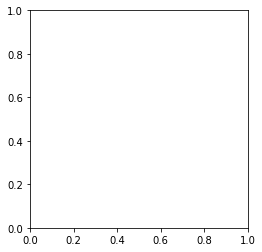

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.imshow('images/epoch90.png')